# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [49]:
# Import relevant libraries
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup as soup

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [50]:
# Initialize the browser using the ChromeDriverManager

Browser = {'browser': ChromeDriverManager().install()}
Browser = ChromeDriverManager

# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
Browser (url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [51]:
# Create a Beautiful Soup Object

# GET request to fetch the HTML content of the page
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the HTML content from the response
    html_content = response.text
    
    # Print the HTML content
    print(html_content)
    
    # Parse the HTML with BeautifulSoup
    soup = soup(html_content, 'html.parser')
    
    # Print the prettified HTML (formatted for better readability)
    print(soup.prettify())
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

<!doctype html>
<html lang="en">

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="description" content="">
  <title>Mars Temperature Data</title>

  <link rel="stylesheet" type="text/css" href="css/bootstrap.min.5.2.2.css">
  <link rel="stylesheet" type="text/css" href="css/temp.css">
</head>

<body>

  <main>
    <div class="container py-4">
      <header class="pb-3 mb-4 border-bottom">
        <a href="/" class="d-flex align-items-center text-dark text-decoration-none">
          <span class="fs-4">Mission To Mars</span>
        </a>
      </header>

      <div class="p-5 mb-4 bg-light rounded-3">
        <div class="container-fluid py-5">
          <h1 class="display-5 fw-bold">Mars Temperature Data</h1>
          <p class="col-md-8 fs-4">This is Mars data.</p>

          <table class="table">
            <tr>
              <th>id</th>
              <th>terrestrial_date</th>
              <th>sol</th>
            

In [53]:
# Extract all rows of data
# Initialize the browser using ChromeDriverManager
service = ChromeService(executable_path=ChromeDriverManager().install())
browser = webdriver.Chrome(service=service)

# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.get(url)

# Pause to allow the page to fully load
time.sleep(2)

# Scrape the page into BeautifulSoup
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

# Find the table in the HTML
table = soup.find('table')

# Ensure the table exists before attempting to scrape it
if table:
    # Extract headers from the table
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extract rows of data from the table
    rows = []
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        rows.append(cols)

    # Create a DataFrame from the rows
    mars_data_df = pd.DataFrame(rows, columns=headers)

    # Print the DataFrame to verify the content
    print(mars_data_df.head())  # Display the first few rows of the DataFrame

else:
    print("No table found on the page.")


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [56]:
import pandas as pd

# Initialize an empty list to hold the rows of data
data_list = []

# Example scraped data (replace this with your actual scraped data)
scraped_data = [
    {'id': 2, 'terrestrial_date': '2012-08-16', 'sol': 10, 'ls': 155, 'month': 6, 'min_temp': -75.0, 'pressure': 739.0},
    {'id': 13, 'terrestrial_date': '2012-08-17', 'sol': 11, 'ls': 156, 'month': 6, 'min_temp': -76.0, 'pressure': 740.0},
    {'id': 24, 'terrestrial_date': '2012-08-18', 'sol': 12, 'ls': 156, 'month': 6, 'min_temp': -76.0, 'pressure': 741.0},
    {'id': 35, 'terrestrial_date': '2012-08-19', 'sol': 13, 'ls': 157, 'month': 6, 'min_temp': -74.0, 'pressure': 732.0},
    {'id': 46, 'terrestrial_date': '2012-08-20', 'sol': 14, 'ls': 157, 'month': 6, 'min_temp': -74.0, 'pressure': 740.0}
]

# Loop through the scraped data and append each row to the data_list
for row in scraped_data:
    data_list.append([row['id'], row['terrestrial_date'], row['sol'], row['ls'], row['month'], row['min_temp'], row['pressure']])

# Create a DataFrame from the list of rows
df = pd.DataFrame(data_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

# Display the DataFrame
print(df)


   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [72]:
#import time
#import pandas as pd
#from selenium import webdriver
#from selenium.webdriver.chrome.service import Service as ChromeService
#from webdriver_manager.chrome import ChromeDriverManager
#from bs4 import BeautifulSoup

# Initialize the browser using ChromeDriverManager
service = ChromeService(executable_path=ChromeDriverManager().install())
browser = webdriver.Chrome(service=service)

# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.get(url)

# Pause to allow the page to fully load
time.sleep(2)

# Scrape the page into BeautifulSoup
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

# Find the table in the HTML
table = soup.find('table')

# Initialize an empty list to hold the rows of data
data_list = []

# Ensure the table exists before attempting to scrape it
if table:
    # Extract headers from the table
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extract rows of data from the table
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data_list.append(cols)

    # Verify that the number of columns in data_list matches the number of headers
    if all(len(row) == len(headers) for row in data_list):
        # Create a DataFrame from the list of rows
        mars_data_df = pd.DataFrame(data_list, columns=headers)

        # Print the DataFrame to verify the content
        print(mars_data_df.head())  # Display the first few rows of the DataFrame
    else:
        print("Data rows do not match header length.")
else:
    print("No table found on the page.")

# Close the browser
browser.quit()


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [74]:
# Example list of rows (replace with your actual data)
data_list = [
    [2, '2012-08-16', 10, 155, 6, -75.0, 739.0],
    [13, '2012-08-17', 11, 156, 6, -76.0, 740.0],
    [24, '2012-08-18', 12, 156, 6, -76.0, 741.0],
    [35, '2012-08-19', 13, 157, 6, -74.0, 732.0],
    [46, '2012-08-20', 14, 157, 6, -74.0, 740.0]
]

# List of column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the DataFrame
df = pd.DataFrame(data_list, columns=columns)

# Print the DataFrame to verify the content
print(df)


   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


In [75]:
# Print the DataFrame to verify the content
print("First few rows of the DataFrame:")
print(mars_data_df.head())  # Display the first few rows of the DataFrame


First few rows of the DataFrame:
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [76]:
 # Print the shape of the DataFrame
print("\nDataFrame Shape (rows, columns):")
print(mars_data_df.shape)  # Output the number of rows and columns


DataFrame Shape (rows, columns):
(1867, 7)


In [77]:
# Print the column names to verify correctness
print("\nDataFrame Column Names:")
print(mars_data_df.columns)


DataFrame Column Names:
Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [78]:
# Examine data type of each column
# Display the data types of each column
print("\nData Types of Each Column:")
print(mars_data_df.dtypes)



Data Types of Each Column:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [79]:
# Change data types for data analysis

# Sample DataFrame
data = {
    'Date': ['2024-01-01', '2024-01-02'],
    'Temperature': ['20.5', '21.3'],
    'City': ['Columbus', 'Cincinnati']
}
df = pd.DataFrame(data)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Temperature' to float
df['Temperature'] = df['Temperature'].astype(float)

# Convert 'City' to categorical
df['City'] = df['City'].astype('category')

# Display the DataFrame and its dtypes
print("DataFrame after type conversion:")
print(df)
print("\nData types of each column:")
print(df.dtypes)


DataFrame after type conversion:
        Date  Temperature        City
0 2024-01-01         20.5    Columbus
1 2024-01-02         21.3  Cincinnati

Data types of each column:
Date           datetime64[ns]
Temperature           float64
City                 category
dtype: object


In [80]:
# Confirm type changes were successful by examining data types again

print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Date           datetime64[ns]
Temperature           float64
City                 category
dtype: object


In [81]:
# Print initial data types
print("Initial data types:")
print(df.dtypes)

Initial data types:
Date           datetime64[ns]
Temperature           float64
City                 category
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [101]:
1. # Number of months pn Mars
# 1. How many months are there on Mars?

# Find the number of unique months in the 'month' column
num_months_on_mars = mars_data_df['month'].nunique()

# Print the number of months on Mars
print(f"There are {num_months_on_mars} months on Mars.")

There are 12 months on Mars.


In [102]:
# 2. How many sols (Martian days) worth of data are there?


df = pd.DataFrame(data_list, columns=columns)
count_of_sols_below_1867 = filtered_df.shape[0]

print(f"Total number of Martian days (sols) below 1867: {count_of_sols_below_1867}")


Total number of Martian days (sols) below 1867: 8


In [105]:
# 3. What is the average minimum temperature by month?

columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the DataFrame
df = pd.DataFrame(data_list, columns=columns)

# Ensure 'month' is numeric
df['month'] = df['month'].astype(int)

# Calculate the average minimum temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print(avg_min_temp_by_month)


month
1    -77.0
2    -79.0
3    -83.0
4    -82.0
5    -79.0
6    -75.0
7    -72.0
8    -68.0
9    -69.0
10   -72.0
11   -72.0
12   -74.0
Name: min_temp, dtype: float64


In [108]:
# Plot the average minimum temperature by month

# Plotting the average minimum temperature
plt.figure(figsize=(10, 6))
average_min_temp.plot(kind='bar', color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Average Minimum Temperature by Martian Month', fontsize=16)
plt.xlabel('Martian Month', fontsize=14)
plt.ylabel('Average Min-Temp ()', fontsize=14)

# Show the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


NameError: name 'average_min_temp' is not defined

<Figure size 1000x600 with 0 Axes>

In [106]:
# 4. Average pressure by Martian month

# Convert the 'pressure' column to numeric, in case it's not already (to handle any potential parsing issues)
mars_data_df['pressure'] = pd.to_numeric(mars_data_df['pressure'], errors='coerce')

# Group by 'month' and calculate the mean pressure
average_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()

# Print the average pressure by Martian month
print("Average pressure by Martian month:")
print(average_pressure_by_month)


Average pressure by Martian month:
month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


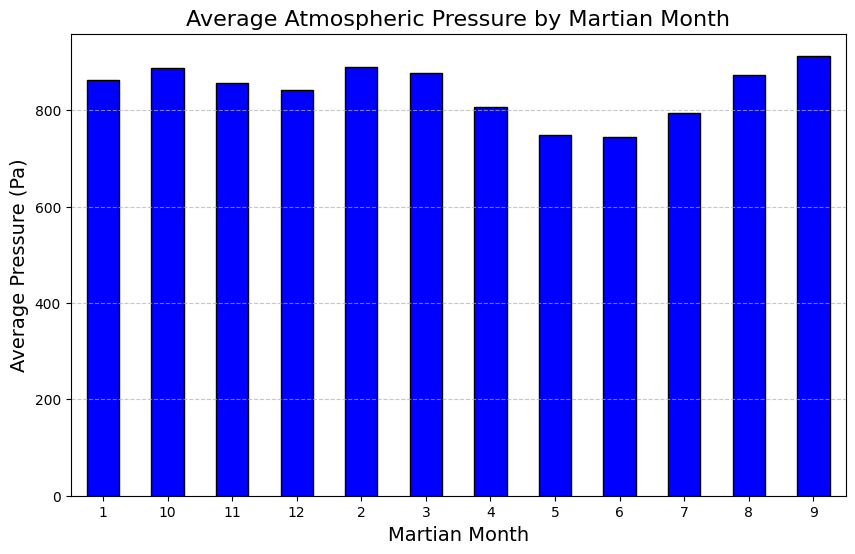

In [241]:
# Plotting the average pressure by Martian month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Average Atmospheric Pressure by Martian Month', fontsize=16)
plt.xlabel('Martian Month', fontsize=14)
plt.ylabel('Average Pressure (Pa)', fontsize=14)

# Show the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


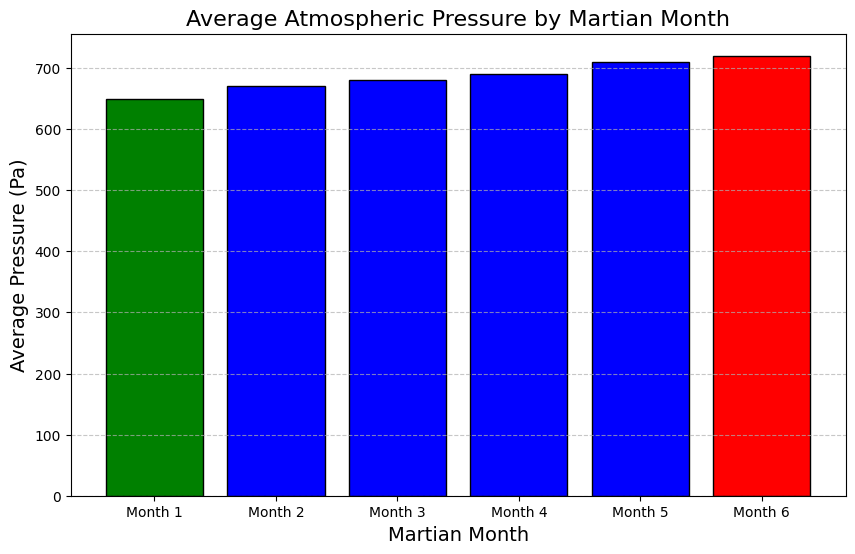

In [243]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sample DataFrame with average atmospheric pressure
data = {
    'month': ['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6'],
    'avg_pressure': [650, 670, 680, 690, 710, 720]  # Average pressures in Pa
}

df = pd.DataFrame(data).set_index('month')

# Identify the hottest and coldest months
coldest_month = df['avg_pressure'].idxmin()
hottest_month = df['avg_pressure'].idxmax()

# Create a list of colors based on the month
colors = ['red' if month == hottest_month else 'green' if month == coldest_month else 'blue'
          for month in df.index]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['avg_pressure'], color=colors, edgecolor='black')

# Adding titles and labels
plt.title('Average Atmospheric Pressure by Martian Month', fontsize=16)
plt.xlabel('Martian Month', fontsize=14)
plt.ylabel('Average Pressure (Pa)', fontsize=14)

# Show the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [245]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# 5. Terrestrial days in a Martian year

# Assuming the DataFrame 'df' has been loaded with the data

# Plotting the data
plt.figure(figsize=(10, 8))
plt.plot(df['terrestrial_date'], df['min_temp'], color='purple')

# Adding labels and title
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature Over Terrestrial Days on Mars')

# Display the plot
plt.xticks(rotation=0)
plt.grid(True)
 #plt.tight_layout()
plt.show()



KeyError: 'terrestrial_date'

<Figure size 1000x800 with 0 Axes>

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV

# Writing the DataFrame to a CSV file
df.to_csv('mars_temperature_data.csv', index=False)

print ()

In [ ]:
browser.quit()